In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [19]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [20]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Train an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Use the MLP to generate "soft labels" (probabilities) for the training data
soft_labels = mlp.predict_proba(X_train)

In [22]:
# Train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Generate "soft labels" (class probabilities) from the MLP on the training data
soft_labels = mlp.predict_proba(X_train)

In [23]:
# Train the distilled decision tree using the MLP's predictions
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, np.argmax(soft_labels, axis=1))  # Use MLP's class predictions as the target

# Evaluate both models on the test set
y_pred_mlp = mlp.predict(X_test)
y_pred_tree = tree.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

In [24]:
print(f"MLP Accuracy: {mlp_accuracy:.2f}")
print(f"Distilled Tree Accuracy: {tree_accuracy:.2f}")

# Plotting decision boundaries for MLP and the distilled decision tree
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(('red', 'blue')))
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

MLP Accuracy: 0.94
Distilled Tree Accuracy: 0.94


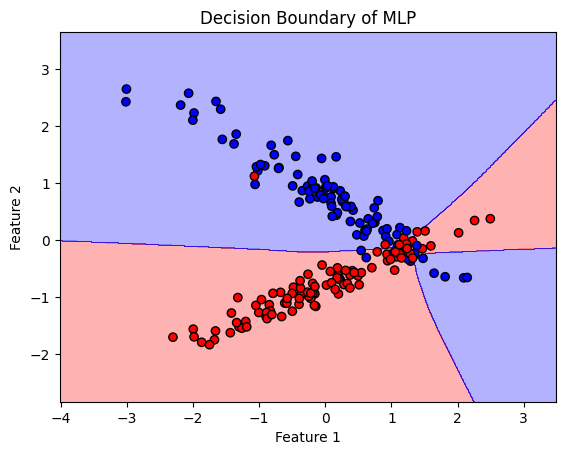

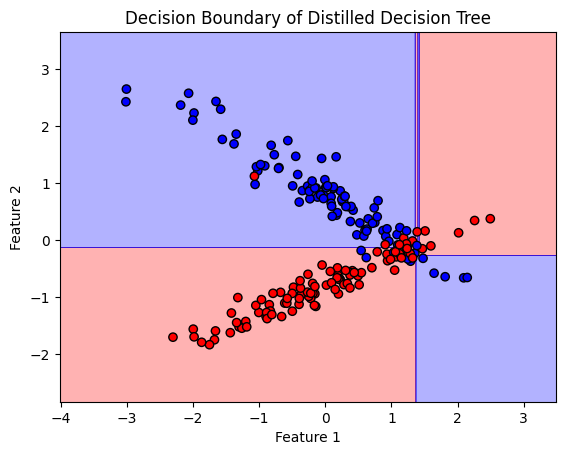

In [25]:
# Plot decision boundaries for MLP
plot_decision_boundaries(X_test, y_test, mlp, "Decision Boundary of MLP")

# Plot decision boundaries for the distilled decision tree
plot_decision_boundaries(X_test, y_test, tree, "Decision Boundary of Distilled Decision Tree")